#### KMS states on Synthetic directed multigraph

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import networkx as nx
from functions import *

In [68]:
### Construct the digraph G
V = list(range(1, 7))
E = [(1, 2), (1, 2), (1, 3), (1, 5),\
      (2, 2), (2, 3), (2, 4), (2, 5),\
              (3, 4), (3, 6), (3, 6),\
      (3, 6), (4, 4), (4, 6),\
              (5, 2), (5, 3), (5, 4), (5, 6)]

N = len(V)
G = nx.MultiDiGraph()
G.add_nodes_from(V)
G.add_edges_from(E)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0]

In [69]:
# Compute critical inverse temperature
bc = critical_inverse_temperature(G)
print(bc)

0.48121182505960347


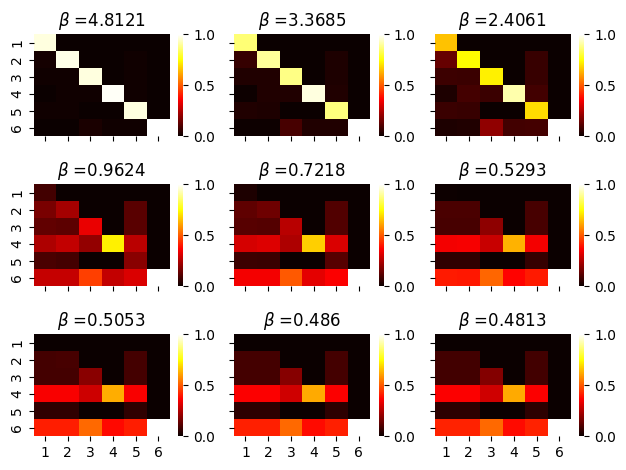

In [74]:
bfactors = [10., 7., 5, 2., 1.5, 1.1, 1.05, 1.01, 1.0001]
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True)

axes_ind = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

for i, bfactor in enumerate(bfactors):
    nodes, KMS = kms_matrix(G, bfactor * bc)
    # im = ax.imshow(KMS)
    ax = axes[axes_ind[i]]
    # Show all ticks and label them with the respective list entries
    # ax.set_xticks(range(N), labels=nodes, ha="right", rotation_mode="anchor")
    # ax.set_yticks(range(N), labels=nodes)
    df = pd.DataFrame(KMS, index = nodes, columns=nodes)
    sns.heatmap(df, cmap='hot', ax=ax)

    ax.set_title(r"$\beta$ =" + f'{round(bfactor*bc,4)}')
    # fig.tight_layout()
    # cbar = plt.colorbar(shrink=.2) 
    # cbar.set_label("Weight", loc='center', size=12)
    # cbar.ax.tick_params(labelsize=10)
    plt.yticks(rotation=0)

fig.tight_layout()
# plt.savefig(f'./results/kms_matrices_synthetic.pdf', dpi=300, bbox_inches='tight')
plt.show()